**Emotion Detection**

**Impoting Required Libraries**

In [1]:

import numpy as np
import pandas as pd
from glob import glob #Glob is to make a list of all filesin the directory
from matplotlib import pyplot as plt 
import cv2
import os
import random
%matplotlib inline

from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("TensorFlow Version:",tf.__version__)

TensorFlow Version: 2.19.0


**Exploring Dataset**

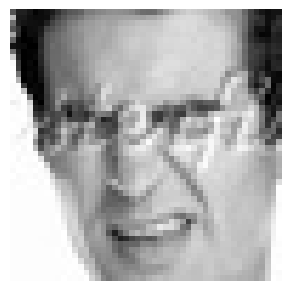

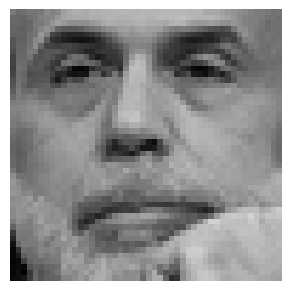

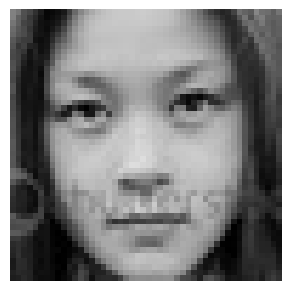

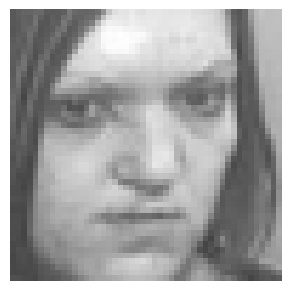

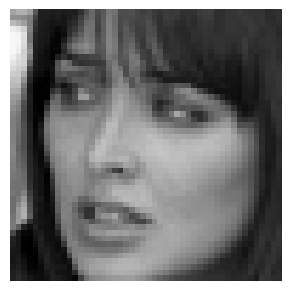

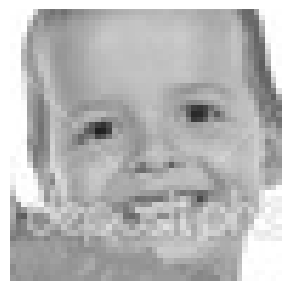

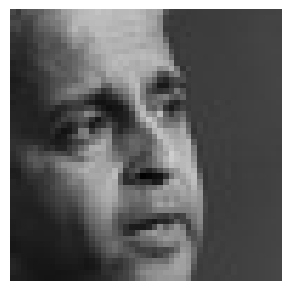

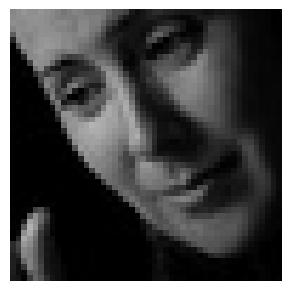

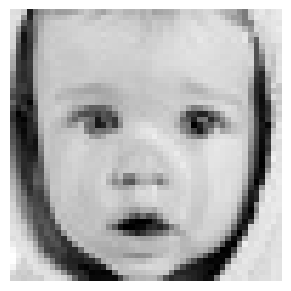

In [2]:
images= glob("Downloads/DataScience_NullClass/Emotion detection/train/**/**")

for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [3]:
img_size=48
batch_size= 64
datagen_train=ImageDataGenerator()
train_generator= datagen_train.flow_from_directory("Downloads/DataScience_NullClass/Emotion detection/train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode=  'grayscale',
                                                   batch_size= batch_size,
                                                   class_mode= "categorical",
                                                   shuffle=True
                                                  )

datagen_validation=ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("Downloads/DataScience_NullClass/Emotion detection/test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode=  'grayscale',
                                                   batch_size= batch_size,
                                                   class_mode= "categorical",
                                                   shuffle=True
                                                  )


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor,filters, kernel_size):
    x= Conv2D(filters = filters, kernel_size= kernel_size, padding = "same")(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size = (2,2))(x)
    x=Dropout(0.25)(x)

    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x= Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x

In [6]:
def model_fer(input_shape):
    inputs =Input(input_shape)
    conv1= Convolution(inputs,32,(3,3))
    conv2=Convolution(conv1,64,(5,5))
    conv3=Convolution(conv2,126,(4,4))

    flatten=Flatten()(conv3)

    dense_1=Dense_f(flatten, 256)

    output=Dense(7,activation ="softmax")(dense_1)

    model=Model(inputs=[inputs],  outputs=[output])

    model.compile(loss= ['categorical_crossentropy'], optimizer= 'adam', metrics=['accuracy'])

    return model

In [7]:
model=model_fer((48,48,1))   #1 implies grayscale 
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 126)         │         129,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 126)         │             504 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 126)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 126)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 126)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,161,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,917 (5.13 MB)

 Trainable params: 1,344,961 (5.13 MB)

 Non-trainable params: 956 (3.73 KB)

**Initializing the Model**

In [8]:
epochs =15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps= validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only= True, mode= 'max', verbose=1)
callback=[checkpoint]

**Training the model**

In [9]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=validation_steps,
    callbacks=callback)

D:\Projects\Python\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3165 - loss: 1.8350
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 693s 2s/step - accuracy: 0.3166 - loss: 1.8346 - val_accuracy: 0.4124 - val_loss: 1.5079
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:11 428ms/step - accuracy: 0.3594 - loss: 1.5131

D:\Projects\Python\tensorflow_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.3594 - loss: 1.5131 - val_accuracy: 0.4099 - val_loss: 1.5072
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.4562 - loss: 1.4171
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.4562 - loss: 1.4170 - val_accuracy: 0.4798 - val_loss: 1.3716
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:07 420ms/step - accuracy: 0.6406 - loss: 1.2436
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6406 - loss: 1.2436 - val_accuracy: 0.4760 - val_loss: 1.3834
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.5157 - loss: 1.2693
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 248s 509ms/step - accuracy: 0.5157 - loss: 1.2693 - val_accuracy: 0.4446 - val_loss: 1.4576
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:09 424ms/step - accuracy: 0.4688 - loss: 1.261

**Model Evaluation**

In [10]:
model.save('emotion_detector.h5')
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.5674 - loss: 1.1567


[1.1386387348175049, 0.5748119354248047]

**Plotting Loss**

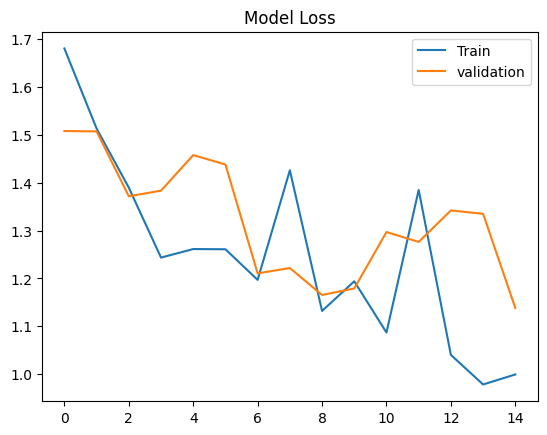

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train','validation'], loc='upper right')
#plt.subplots_adjust(top=1.0,bottom=0.0,left=0.0,right=0.95,hspace=0.25,wspace=0.35)

Text(0.5, 1.0, 'Model Accuracy')

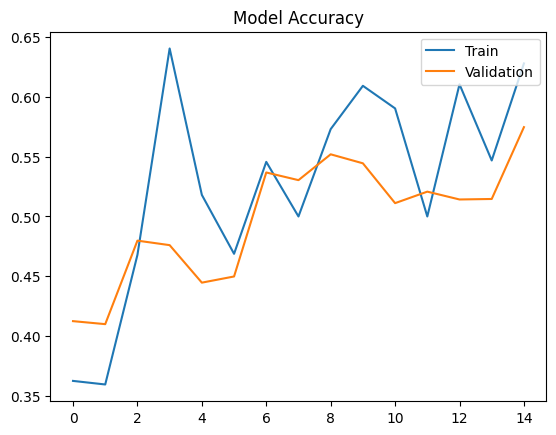

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'], loc ='upper right')
plt.title("Model Accuracy")


In [13]:
model_json=model.to_json()
with open('model_arch.json','w') as json_file:
    json_file.write(model_json)